In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np  # linear algebra
from scipy.stats import randint as sp_randint
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

**VARIABLES**

*  **age: age in years**

*   **sex: sex** (1 = male; 0 = female)

*   **cp: chest pain type** -- Value 1: typical angina -- Value 2: atypical angina -- Value 3: non-anginal pain -- Value 4: asymptomatic 10

*  **trestbps: resting blood pressure** (in mm Hg on admission to the hospital)

*   **chol: serum cholestoral** in mg/dl

*  **fbs: (fasting blood sugar > 120 mg/dl)** (1 = true; 0 = false)

*   **restecg: resting electrocardiographic results** -- Value 0: normal -- Value 1: having ST-T wave abnormality 
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 20 ekgmo

*   ** thalach: maximum heart rate achieved**
*  **exang: exercise induced angina **(1 = yes; 0 = no)

* ** oldpeak = ST depression induced by exercise relative to rest**


*   **slope: the slope of the peak exercise ST segment** -- Value 1: upsloping -- Value 2: flat -- Value 3: downsloping


*   **ca: number of major vessels** (0-3) colored by flourosopy


*   ** thal: thalassemia**-- 3 = normal; 6 = fixed defect; 7 = reversable defect

*    **target:** 0(no presence) 1(presence)

#  **Basic Insights**

In [3]:
heart_data = pd.read_csv('/content/drive/MyDrive/AI/heart_dis_pred.csv')

In [4]:
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
print('Number of Rows:', heart_data.shape[0])
print('Number of Features:', heart_data.shape[1])

Number of Rows: 303
Number of Features: 14


In [6]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


* No Null Values found

-------------

# **EXPLORATORY DATA ANALYSIS**

In [7]:
heart_data.columns = ['Age', 'Sex',  'Chest_pain_type', 'Resting_blood_pressure', 'Serum_cholestoral(mg/dl)', 'Fasting_blood_sugar(mg/dl)', 'Resting_ECG_results', 'Max_heart_rate'
                    , 'Exercise_induced_angina', 'Oldpeak', 'Slope', 'No.of_major_vessels', 'thalassemia','target']

In [8]:
data_sample = heart_data.copy()

In [9]:
data_sample['Sex'][data_sample['Sex']==1]='Male' 
data_sample['Sex'][data_sample['Sex']==0]='Female'

data_sample['Chest_pain_type'][data_sample['Chest_pain_type'] == 1] = 'typical angina' 
data_sample['Chest_pain_type'][data_sample['Chest_pain_type'] == 2] = 'atypical angina' 
data_sample['Chest_pain_type'][data_sample['Chest_pain_type'] == 3] = 'non-anginal pain' 
data_sample['Chest_pain_type'][data_sample['Chest_pain_type'] == 4] = 'asymptomatic'

data_sample['Fasting_blood_sugar(mg/dl)'][data_sample['Fasting_blood_sugar(mg/dl)'] == 0] = 'lower than 120mg/ml' 
data_sample['Fasting_blood_sugar(mg/dl)'][data_sample['Fasting_blood_sugar(mg/dl)'] == 1] = 'greater than 120mg/ml'

data_sample['Resting_ECG_results'][data_sample['Resting_ECG_results'] == 0] = 'normal' 
data_sample['Resting_ECG_results'][data_sample['Resting_ECG_results'] == 1] = 'ST-T wave abnormality' 
data_sample['Resting_ECG_results'][data_sample['Resting_ECG_results'] == 2] = 'left ventricular hypertrophy'

data_sample['Exercise_induced_angina'][data_sample['Exercise_induced_angina'] == 0] = 'no' 
data_sample['Exercise_induced_angina'][data_sample['Exercise_induced_angina'] == 1] = 'yes'

data_sample['Slope'][data_sample['Slope'] == 1] = 'upsloping' 
data_sample['Slope'][data_sample['Slope'] == 2] = 'flat' 
data_sample['Slope'][data_sample['Slope'] == 3] = 'downsloping'

data_sample['thalassemia'][data_sample['thalassemia'] == 1] = 'normal' 
data_sample['thalassemia'][data_sample['thalassemia'] == 2] = 'fixed defect' 
data_sample['thalassemia'][data_sample['thalassemia'] == 3] = 'reversable defect'

<ipython-input-9-d310978480b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sample['Sex'][data_sample['Sex']==1]='Male'
<ipython-input-9-d310978480b4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sample['Chest_pain_type'][data_sample['Chest_pain_type'] == 1] = 'typical angina'
<ipython-input-9-d310978480b4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sample['Fasting_blood_sugar(mg/dl)'][data_sample['Fasting_

In [10]:
heart_data.head()

,Age,Sex,Chest_pain_type,Resting_blood_pressure,Serum_cholestoral(mg/dl),Fasting_blood_sugar(mg/dl),Resting_ECG_results,Max_heart_rate,Exercise_induced_angina,Oldpeak,Slope,No.of_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


 **1. Distribution Of target**

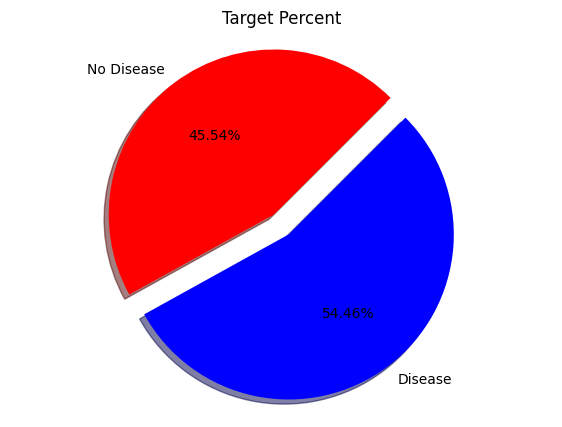

In [11]:
def plot1():
  plt.figure(figsize=(7, 5))
  target_count = [len(data_sample[data_sample['target'] == 0]),len(data_sample[data_sample['target'] == 1])]
  labels = ['No Disease', 'Disease']
  colors = ['red', 'blue']
  explode = (0.05, 0.1)
  plt.pie(target_count, explode=explode, labels=labels, 
        colors=colors,autopct='%4.2f%%',shadow=True, startangle=45)
  plt.title('Target Percent')
  plt.axis('equal')
  plt.show()  
plot1()

**2. Distribution of Sex**

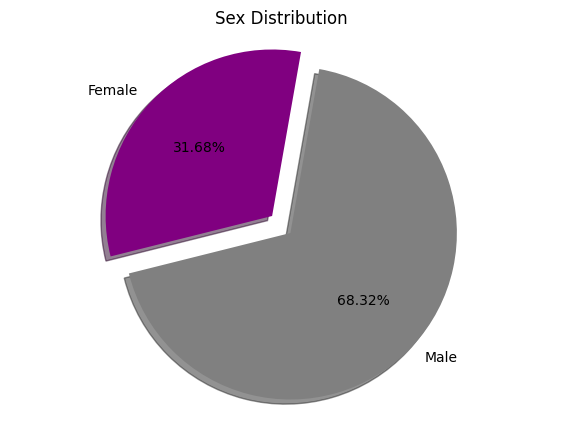

In [12]:
def plot2():
  plt.figure(figsize=(7, 5))
  sex_count = [len(data_sample[data_sample['Sex'] == 'Female']),len(data_sample[data_sample['Sex'] == 'Male'])]
  labels = ['Female', 'Male']
  colors = ['purple', 'grey']
  explode = (0.05, 0.1)
  plt.pie(sex_count, explode=explode, labels=labels, 
        colors=colors,autopct='%4.2f%%',shadow=True, startangle=80)
  plt.title('Sex Distribution')
  plt.axis('equal')
  plt.show()
  
plot2()

Male Population is higher and their likelyhood to test posive is high as well.

**Distribution of age**

<ipython-input-13-77152697305b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_sample['Age'])


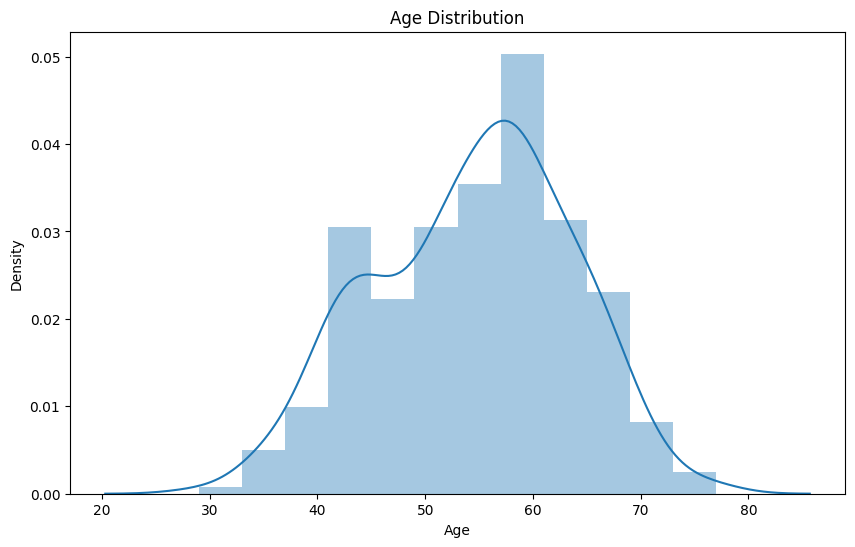

In [13]:
def plot3():
    plt.figure(figsize=(10,6))
    sns.distplot(data_sample['Age'])
    plt.title('Age Distribution')
    plt.show()
plot3()   

Age is normally distributed.

**4. Sex Type and Age vs Heart Disease**

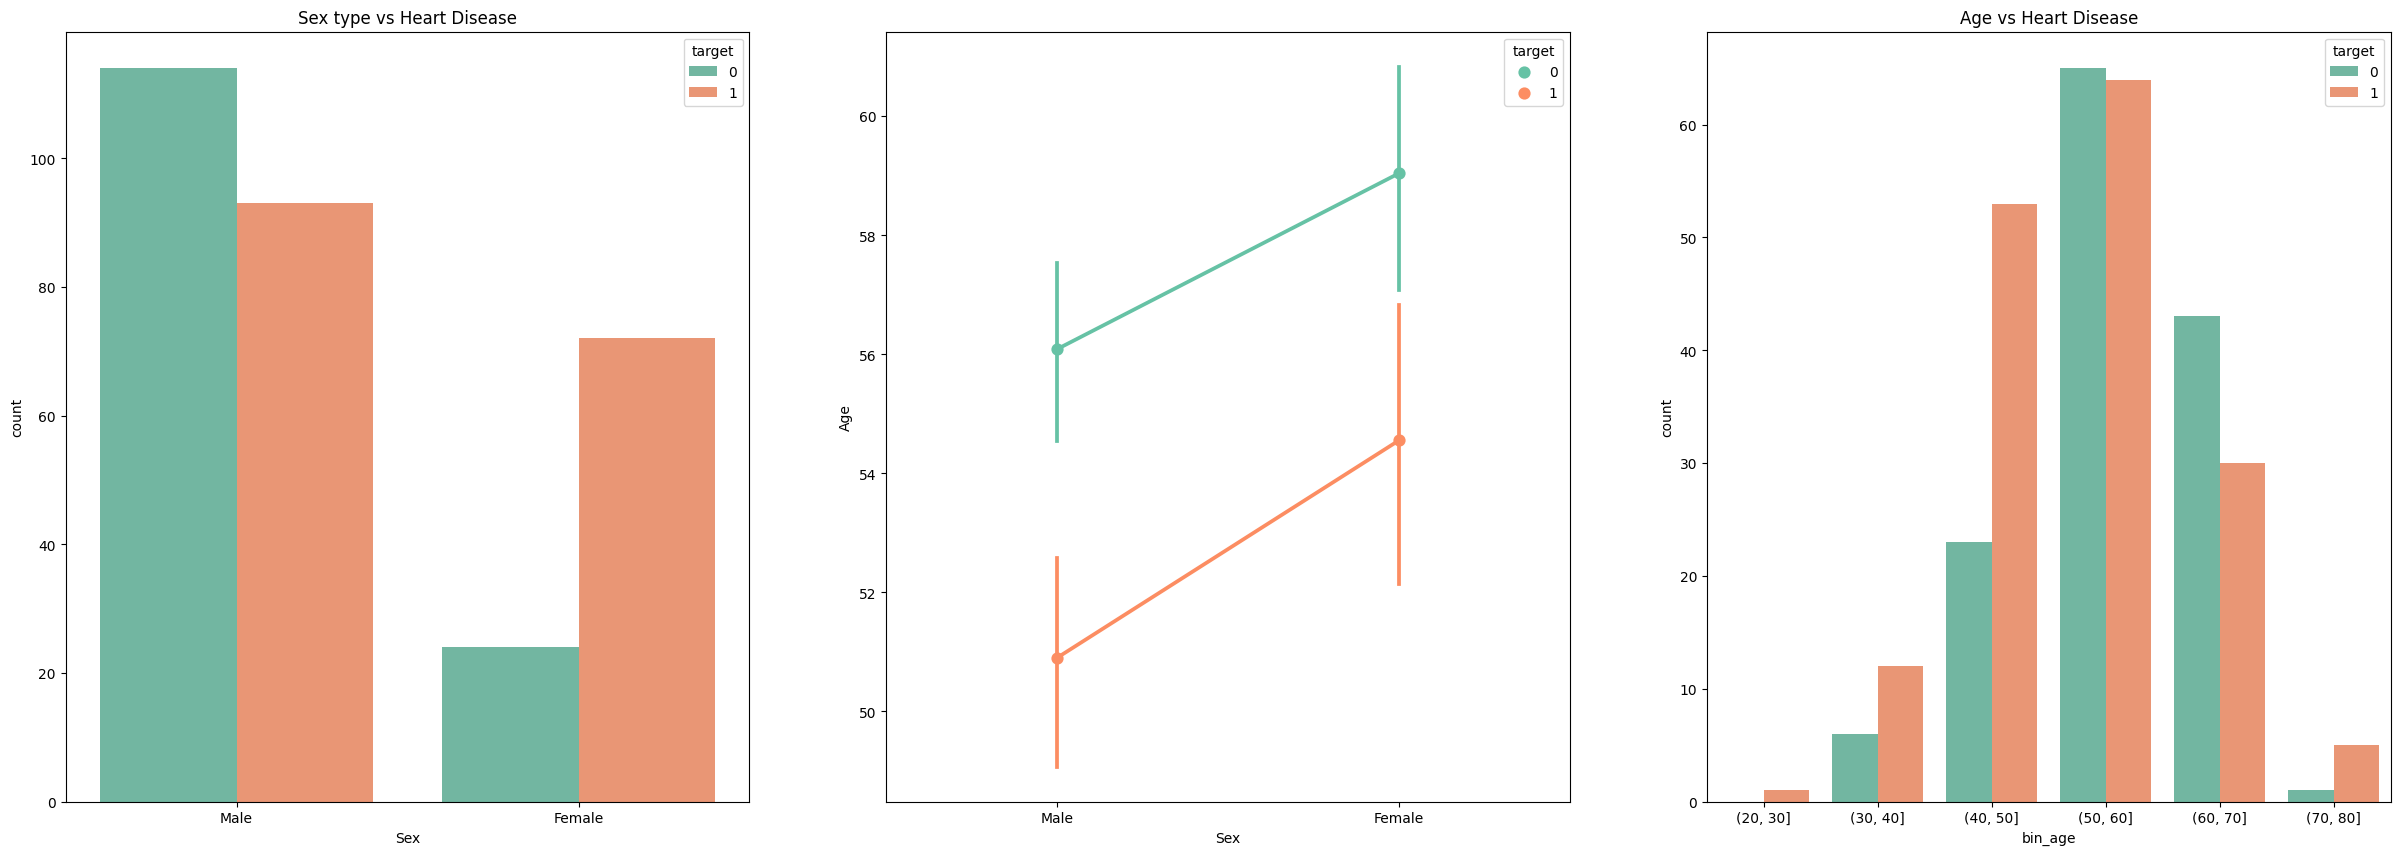

In [14]:
def plot4():
 
    plt.figure(figsize=(30,10))
  
    age_bins = [20,30,40,50,60,70,80]
    data_sample['bin_age'] = pd.cut(data_sample['Age'], bins=age_bins)
  
    plt.subplot(1,3,1)
    p1 = sns.countplot(x='Sex', data=data_sample, hue='target', palette='Set2')
    p1.set_title('Sex type vs Heart Disease')
    
    plt.subplot(1,3,2)
    p2 = sns.pointplot(x='Sex', y='Age', data=data_sample, hue='target', palette='Set2')
    p1.set_title('Sex type vs Heart Disease')
        
    plt.subplot(1,3,3)
    p3 = sns.countplot(x='bin_age', data=data_sample, hue='target', palette='Set2')
    p3.set_title('Age vs Heart Disease')
    
plot4()


**from the graph Males are more likely to get heart disease**

**Average age for females with heart disease is 54 and male with heart disease is 50**

**heart disease affects people with of ages around 50 years**


##Factors related to heart disease

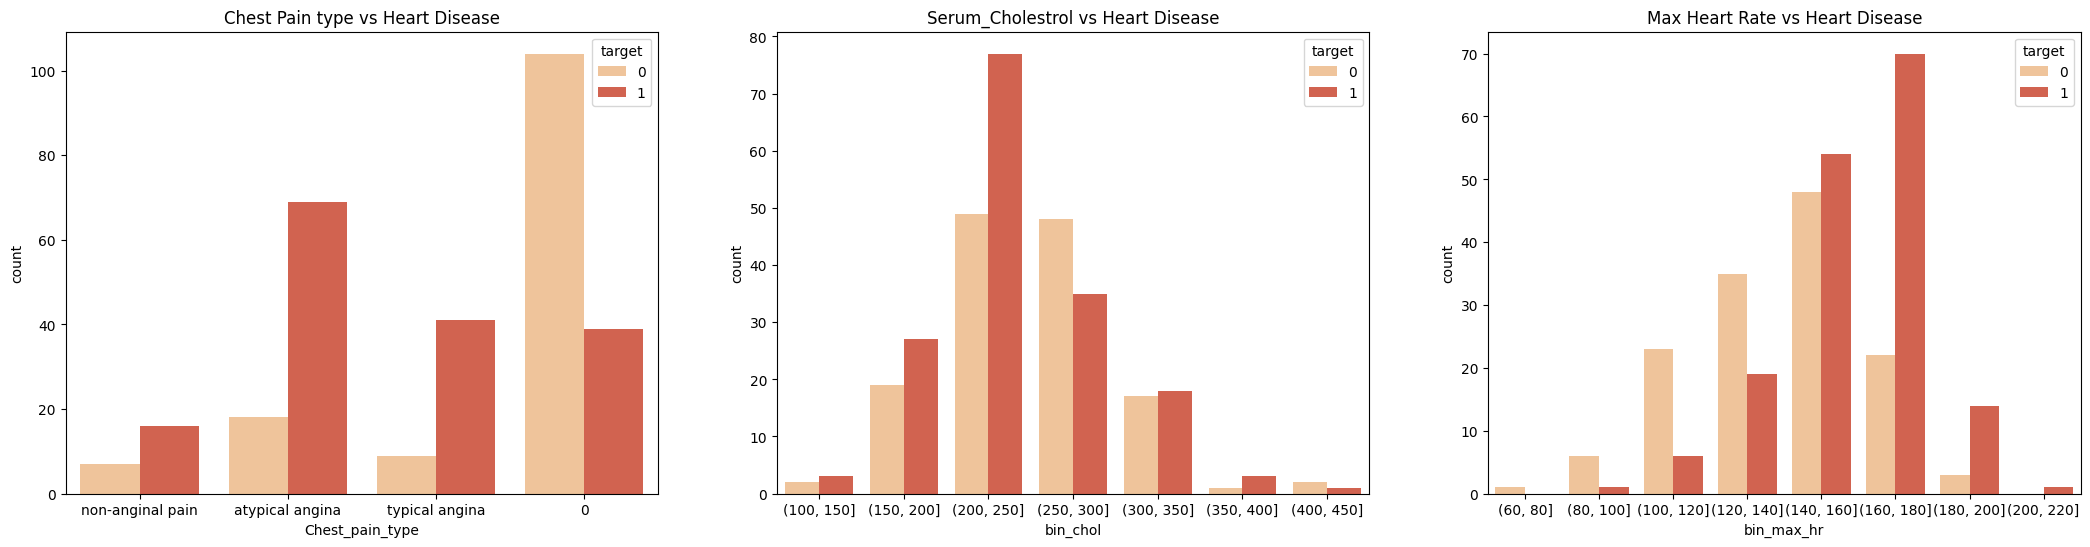

In [15]:
def plot5():
  
    plt.figure(figsize=(26,6))
    chol_bins = [100,150,200,250,300,350,400,450]
    max_hr_bins = [60,80,100,120,140,160,180,200,220]
    
    data_sample['bin_chol'] = pd.cut(data_sample['Serum_cholestoral(mg/dl)'], bins=chol_bins)
    data_sample['bin_max_hr'] = pd.cut(data_sample['Max_heart_rate'], bins=max_hr_bins)
    
    plt.subplot(1,3,1)
    p1 = sns.countplot(x='Chest_pain_type', data=data_sample, hue='target', palette='OrRd')
    p1.set_title('Chest Pain type vs Heart Disease')
        
    plt.subplot(1,3,2)
    p2 = sns.countplot(x='bin_chol', data=data_sample, hue='target', palette='OrRd')
    p2.set_title('Serum_Cholestrol vs Heart Disease')
    
    plt.subplot(1,3,3)
    p3 = sns.countplot(x='bin_max_hr', data=data_sample, hue='target', palette='OrRd')
    p3.set_title('Max Heart Rate vs Heart Disease')
    
plot5()

**Insights:**

**Atypical angina chest pain resulted in more heart disease**

**Cholestrol Range of 200 - 300 have resulted in heart disease**

**Maximum heart rate between 140 to 180 have resulted in heart disease**

**6. Atrributes asscicated with showing heart disease - 2**

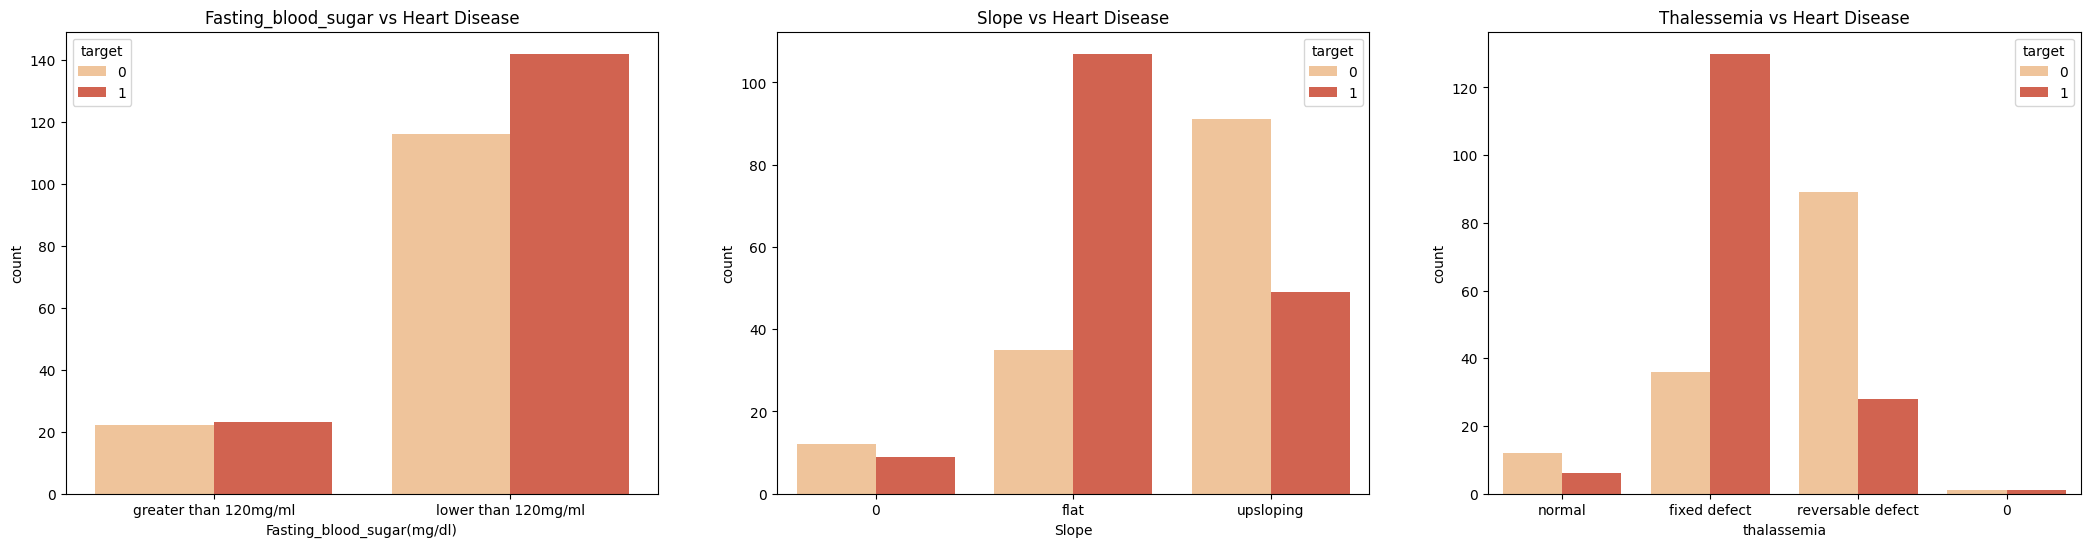

In [16]:
def plot6():
    plt.figure(figsize=(26,6))
    plt.subplot(1,3,1)
    p1 = sns.countplot(x='Fasting_blood_sugar(mg/dl)', data=data_sample, hue='target', palette='OrRd')
    p1.set_title('Fasting_blood_sugar vs Heart Disease')
        
    plt.subplot(1,3,2)
    p2 = sns.countplot(x='Slope', data=data_sample, hue='target', palette='OrRd')
    p2.set_title('Slope vs Heart Disease')
    
    plt.subplot(1,3,3)
    p3 = sns.countplot(x='thalassemia', data=data_sample, hue='target', palette='OrRd')
    p3.set_title('Thalessemia vs Heart Disease')
plot6()



**Blood Sugar level lower than 120mg/ml has resulted in more heart disease**

**Slope type of flat have resulted in heart disease**

**Thalassemai type of fixed defect have resulted in heart disease**

**7. Atrributes asscicated with showing heart disease - 3**

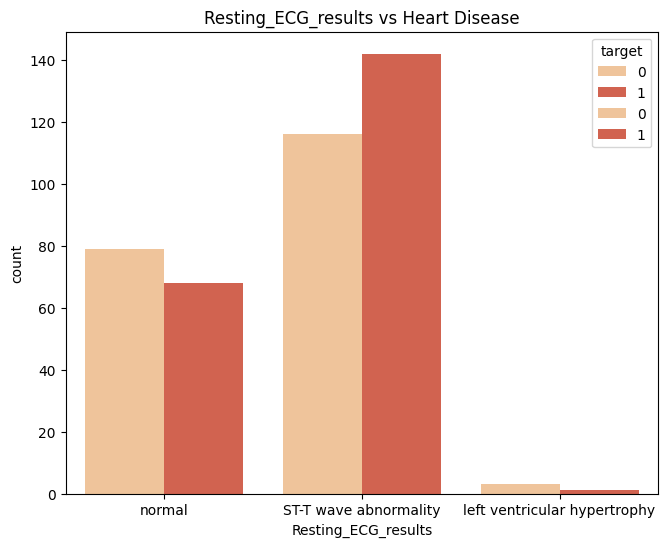

In [17]:
def plot7():
    plt.figure(figsize=(26,6))
    plt.subplot(1,3,1)
    p1 = sns.countplot(x='Fasting_blood_sugar(mg/dl)', data=data_sample, hue='target', palette='OrRd')
    p1.set_title('Fasting_blood_sugar vs Heart Disease')
         
  
    p1 = sns.countplot(x='Resting_ECG_results', data=data_sample, hue='target', palette='OrRd')
    p1.set_title('Resting_ECG_results vs Heart Disease')
    
    
plot7()

**Ages vs heart disease **

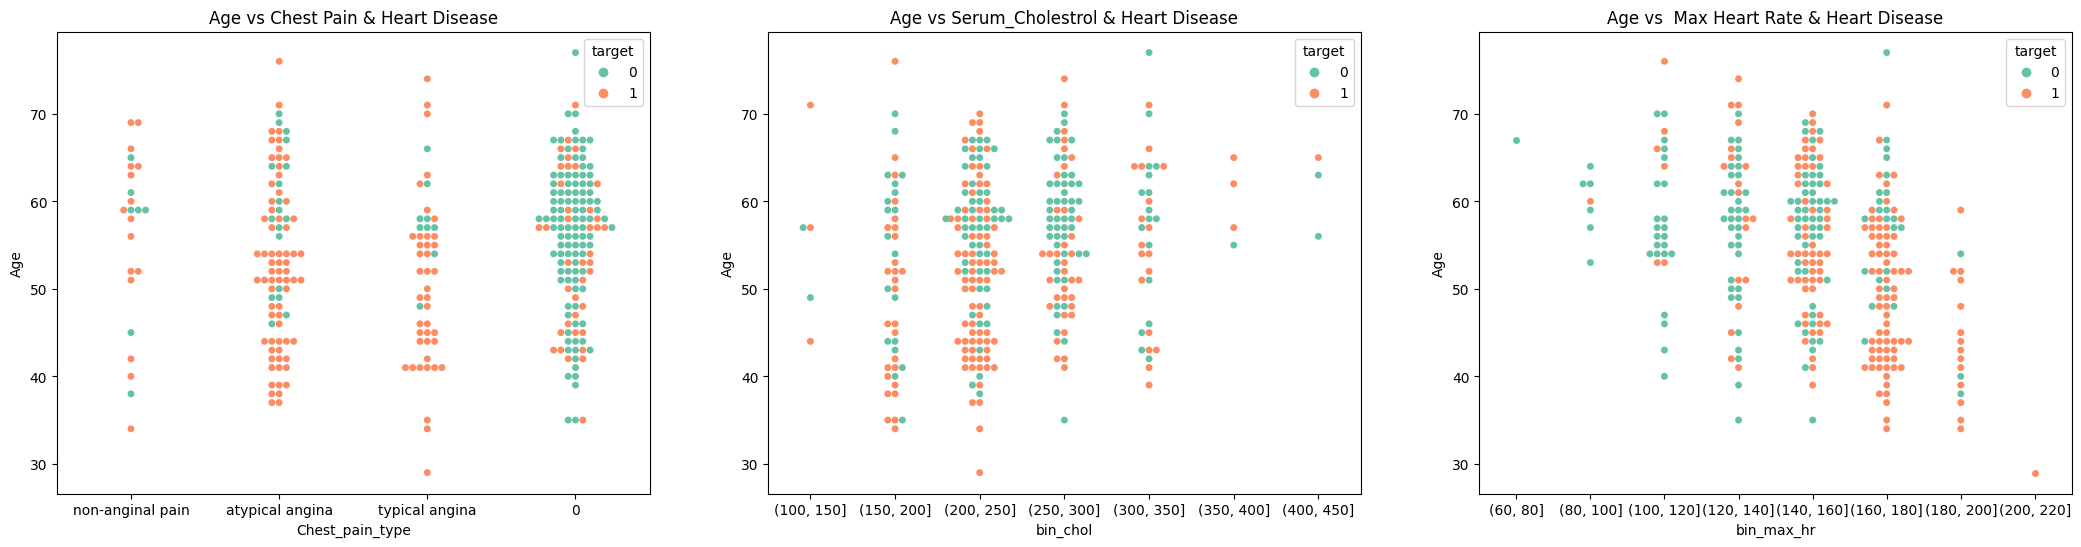

In [18]:
def plot8():
    plt.figure(figsize=(26,6))
    
    plt.subplot(1,3,1)
    p1 = sns.swarmplot(x='Chest_pain_type', y='Age', data=data_sample, hue='target', palette='Set2')
    p1.set_title('Age vs Chest Pain & Heart Disease')
        
    plt.subplot(1,3,2)
    p2 = sns.swarmplot(x='bin_chol', y='Age', data=data_sample, hue='target', palette='Set2')
    p2.set_title('Age vs Serum_Cholestrol & Heart Disease')
    
    plt.subplot(1,3,3)
    p3 = sns.swarmplot(x='bin_max_hr',y='Age', data=data_sample, hue='target', palette='Set2')
    p3.set_title('Age vs  Max Heart Rate & Heart Disease')
plot8()



**Important note here - Chest pain type makes an important factor for having heart disesese because most of the cases with target 1 have chest                      pain**

**Cholestrol level 200-250 is more among the age range 40 - 60**

**Max heart rate between 160-180 that have led to heart disease are more likely to occur for age group of 40-50**

**Ages vs heart disease**

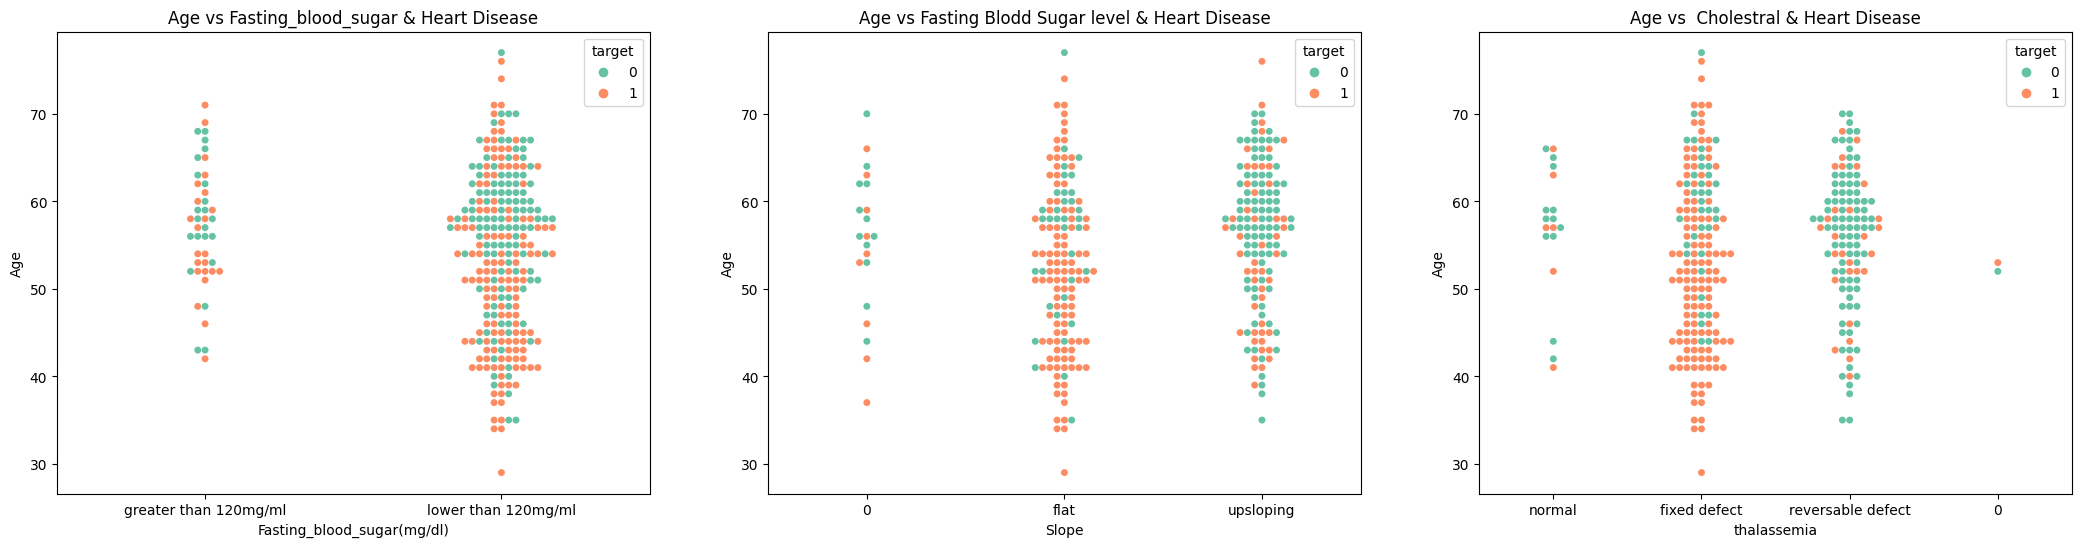

In [19]:
def plot9():
    plt.figure(figsize=(26,6))
    
    plt.subplot(1,3,1)
    p1 = sns.swarmplot(x='Fasting_blood_sugar(mg/dl)', y='Age', data=data_sample, hue='target', palette='Set2')
    p1.set_title('Age vs Fasting_blood_sugar & Heart Disease')
        
    plt.subplot(1,3,2)
    p2 = sns.swarmplot(x='Slope', y='Age', data=data_sample, hue='target', palette='Set2')
    p2.set_title('Age vs Fasting Blodd Sugar level & Heart Disease')
    
    plt.subplot(1,3,3)
    p3 = sns.swarmplot(x='thalassemia',y='Age', data=data_sample, hue='target', palette='Set2')
    p3.set_title('Age vs  Cholestral & Heart Disease')
plot9()



**Most of our observation shows Blood sugar level lower than 120mg/ml**

**Distribution of slope type with ages**

**Thalassemia type of fixed defect that have led to heart disease are more likely to occur for age group of 40-55**

**Ages vs heart disease**

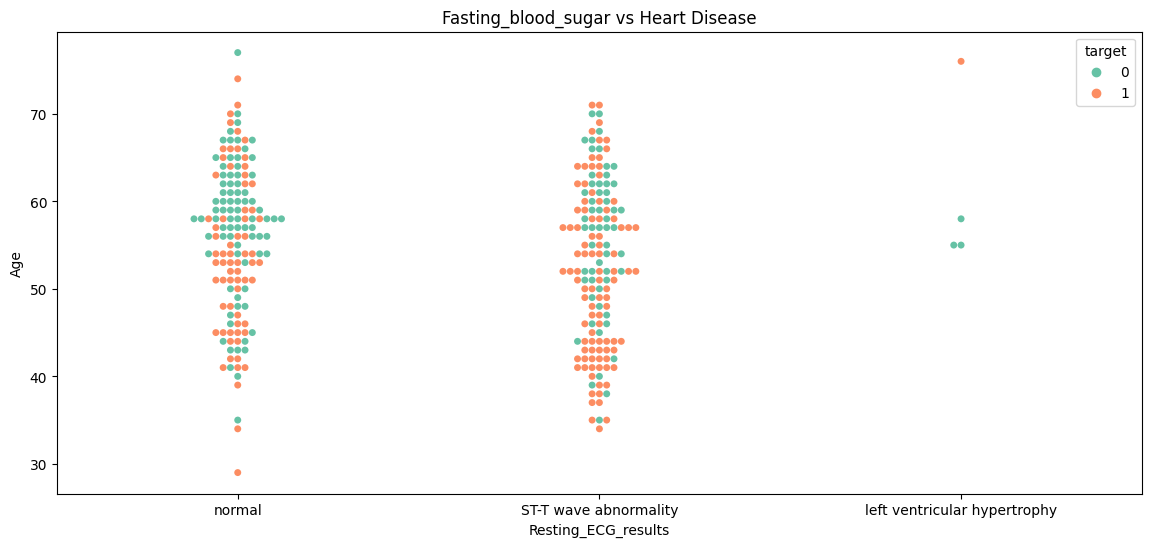

In [20]:
def plot10():
    plt.figure(figsize=(14,6))
    p1 = sns.swarmplot(x='Resting_ECG_results', y='Age', data=data_sample, hue='target', palette='Set2')
    p1.set_title('Fasting_blood_sugar vs Heart Disease')           
plot10()

-------------------


#Prediction using  machine learning

In [21]:
# Import necessary modules and functions from Scikit-learn library
from sklearn.preprocessing import StandardScaler # For feature scaling
from sklearn.model_selection import train_test_split # For train/test splitting
from sklearn.metrics import classification_report # For generating classification report


from sklearn.tree import DecisionTreeClassifier # For building decision tree models
from sklearn.ensemble import RandomForestClassifier # For building random forest models
from sklearn.neighbors import KNeighborsClassifier #For building k-nearest neighbor models
from sklearn.linear_model import LogisticRegression # For building logistic regression models
from sklearn.svm import SVC # For building support vector machine models
from sklearn.naive_bayes import GaussianNB # For building Gaussian naive Bayes models


from sklearn.model_selection import RandomizedSearchCV # For performing randomized search
from sklearn.model_selection import GridSearchCV  # For performing grid search

from sklearn.metrics import accuracy_score # For computing classification accuracy
from sklearn.model_selection import cross_val_score # For computing cross-validation scores
from sklearn.metrics import confusion_matrix # For computing confusion matrix
from sklearn import metrics # For computing various performance metrics

In [22]:
# Select all columns in heart_data except the 'target' column and assign to variable X
X = heart_data.loc[:, heart_data.columns!='target']
# Display the first 5 rows of the X DataFrame for inspection
X.head()

,Age,Sex,Chest_pain_type,Resting_blood_pressure,Serum_cholestoral(mg/dl),Fasting_blood_sugar(mg/dl),Resting_ECG_results,Max_heart_rate,Exercise_induced_angina,Oldpeak,Slope,No.of_major_vessels,thalassemia
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [23]:
# Select only the 'target' column from the heart_data DataFrame and assign to variable y
y = heart_data.loc[:, heart_data.columns=='target']
# Display the first 5 rows of the y DataFrame for inspection
y.head()

,target
0,1
1,1
2,1
3,1
4,1


In [24]:
# Split the X and y DataFrames into training and testing sets
# random_state=1 ensures that the split is reproducible
# test_size=0.25 splits the data into a 75/25 train-test split
# stratify=y ensures that the class proportions are balanced in both the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.25, stratify=y )

In [25]:
# Print the shape of the X_train and X_test DataFrames to confirm the split was done correctly
print(X_train.shape)
print(X_test.shape)

(227, 13)
(76, 13)


In [26]:
print(y_train.shape)
print(y_test.shape)

(227, 1)
(76, 1)


**Model 1 : Decision Tree **

In [27]:
# Define a function that returns a DecisionTreeClassifier object
# with random_state=1 for reproducibility
def tree1():
  
   return DecisionTreeClassifier(random_state=1)

# Call the tree1() function to create an instance of the model  
Model1 = tree1()
# Fit the model to the training data using the fit() method
Model1.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [28]:
# Generate predictions for the test set using the predict() method
prediction_model1 = Model1.predict(X_test)
# Calculate the accuracy of the model on the test set using the accuracy_score() function
print('Decision Tree accuracy score', accuracy_score(y_test, prediction_model1))

Decision Tree accuracy score 0.75


-----------------

**Model 2: Decision tree with Gridsearchcv**

In [29]:
# Define a function that performs a grid search with cross-validation
# on a DecisionTreeClassifier model to find the best hyperparameters
def tree2():
  
  dtree = DecisionTreeClassifier(random_state=1)
  params = {'splitter':['best'],  'max_depth': range(2,60),
             'min_samples_split': [2,3,4,5,6,7,8,9,10],
            'max_features':['sqrt','log2',None]}
  
  return GridSearchCV(dtree, params, cv=10)

# Call the tree2() function to create an instance of the model
Model2 = tree2()
# Fit the model to the training data using the fit() method
Model2.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'max_depth': range(2, 60),
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best']})

In [30]:
# Generate predictions for the test set using the predict() method
prediction_model2 = Model2.predict(X_test)
# Calculate the accuracy of the model on the test set using the accuracy_score() function
print('Decision Tree with gridsearchcv accuracy score',accuracy_score(y_test,prediction_model2))

Decision Tree with gridsearchcv accuracy score 0.8421052631578947


-----------------

**Model 3: Random Forest**

In [31]:
#This code defines a function called `tree3()` that creates an instance of a `RandomForestClassifier` model with a fixed random state.
#After defining the function, the code creates an instance of the model by calling `tree3()` and assigns it to the variable `Model3`. Then, the model is fit to the training data using the `fit()` method with `X_train` and `y_train` as inputs.
#When the model is used to make predictions on the test set using the `predict()` method, a warning is generated indicating that a column-vector `y` was passed instead of a 1D array. This can be resolved by reshaping the `y` variable using the `ravel()` method, which flattens the array to a 1D array.

def tree3():
  
  return RandomForestClassifier(random_state=1)
  
Model3 = tree3()
Model3.fit(X_train,y_train)  

<ipython-input-31-40c74ae9dcd1>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  Model3.fit(X_train,y_train)


RandomForestClassifier(random_state=1)

In [32]:
prediction_model3 = Model3.predict(X_test)
print('Random forest accuracy score', accuracy_score(y_test,prediction_model3))

Random forest accuracy score 0.8289473684210527


-----------------

**Model 4: Random Forest with RandomizedSearchCV**

In [33]:
#The code defines a function tree4() that returns a  RandomizedSearchCV object initialized with a RandomForestClassifier
# The hyperparameters of the RandomForestClassifier are set using a dictionary params with the following hyperparameters:
#max_depth: range of values for the maximum depth of the trees
#min_samples_split: range of values for the minimum number of samples required to split an internal node
#min_samples_leaf: range of values for the minimum number of samples required to be at a leaf node
#bootstrap: whether or not bootstrap samples are used when building trees
#n_estimators: range of values for the number of trees in the forest
#criterion: function to measure the quality of a split
#max_features: range of values for the number of features to consider when looking for the best split.

def tree4():
  
  rf = RandomForestClassifier(random_state=1)
  params = {"max_depth": range(2,5),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "n_estimators": [100, 400, 700, 1000, 1500],
              "criterion" : ["gini", "entropy"],
              'max_features': ['sqrt', 'log2', None]
             }
  n_iter = 50

  return RandomizedSearchCV(rf, param_distributions = params, n_iter = n_iter, n_jobs=-1)
  
Model4 = tree4()
Model4.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(estimator=RandomForestClassifier(random_state=1), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 5),
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fb7032e0250>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fb703328040>,
                                        'n_estimators': [100, 400, 700, 1000,
                                                         1500]})

In [34]:
prediction_model4 = Model4.predict(X_test)
print('Random Forest with RandomizedSearchCV accuracy score:', accuracy_score(y_test,prediction_model4))

Random Forest with RandomizedSearchCV accuracy score: 0.7894736842105263


In [35]:
print('Best Prameters:', Model4.best_params_)
print('Best Score:', Model4.best_score_)

Best Prameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.837584541062802


In [67]:
#creates an empty pandas DataFrame called model4_matrix
model4_matrix = pd.DataFrame()
#prediction_model4 parameter should contain the predicted values from the model being evaluated.
model4_matrix = pd.DataFrame(confusion_matrix(y_test, prediction_model4))
#The row labels are set to "Actual No Disease" and "Actual Disease", which presumably correspond to the two possible classes in the classification problem being solved.
model4_matrix.index = ['Actual No Disease','Actual Disease']
#The column labels are set to "Predicted No Disease" and "Predicted Disease", which again presumably correspond to the two possible classes in the classification problem being solved.
model4_matrix.columns = ['Predicted No Disease','Predicted Disease']
model4_matrix

,Predicted No Disease,Predicted Disease
Actual No Disease,26,9
Actual Disease,7,34


**Excellent Random Forest with RandomizedSearchCV has given good accuracy.**

----------------------

**Normalizing the values for certain models**

In [41]:
# Create an instance of the StandardScaler class and fit it to the dataset X
scaler = StandardScaler().fit(X)

# Use the scaler to transform the dataset X, creating a new standardized dataset X1
X1 = scaler.transform(X)


In [42]:
# Convert the standardized dataset X1 to a pandas DataFrame
X1 = pd.DataFrame(X1)

# Print the first five rows of the DataFrame to inspect the standardized values
X1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922


In [43]:
# Split the standardized dataset X1 and the target variable y into training and testing sets
# X1_train and y_train will be used to train the model, while X1_test and y_test will be used to evaluate its performance
# The data will be split randomly using a random seed of 1 and a test size of 25% of the total data
# The stratify parameter is used to ensure that the proportion of classes in the target variable is similar in both the training and testing sets
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, random_state=1, test_size=0.25, stratify=y)

In [44]:
# Create an empty list to store the accuracy scores for each k value
accuracy_list = []

# Define a function called knn1 that performs k-nearest neighbors classification
def knn1():
    # Loop over a range of k values from 1 to 25
    for i in range(1,25):
        # Create a KNeighborsClassifier object with the current k value
        model = KNeighborsClassifier(n_neighbors=i)
        # Train the model on the training data
        model.fit(X1_train, y_train)
        # Use the model to make predictions on the test data
        pred = model.predict(X1_test)
        # Calculate the accuracy score of the model and append it to the accuracy list
        accuracy_list.append(accuracy_score(y_test, pred))
    # Find the k value that corresponds to the maximum accuracy score and print it
    print("Max accuracy and its k value is:", max([(v, i+1) for i, v in enumerate(accuracy_list)])) 

# Call the knn1 function
knn1()

Max accuracy and its k value is: (0.868421052631579, 16)


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

Good We have found a K value with best accuracy so far

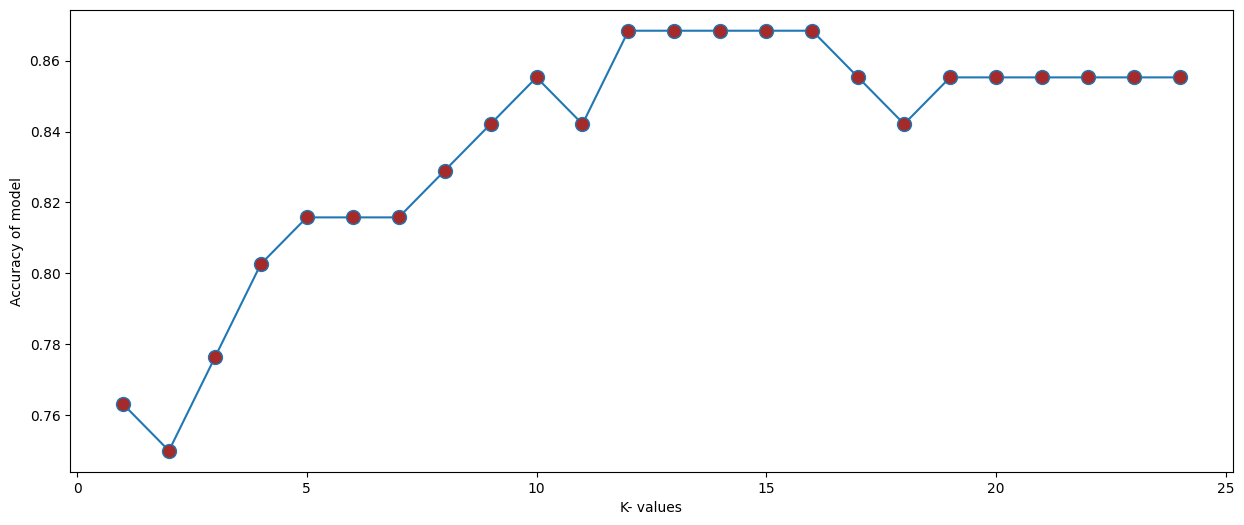

In [45]:
# Define a function called k_plot that creates a line plot of the accuracy scores for different k values
def k_plot():
  # Set the size of the figure
  plt.figure(figsize=(15,6))
  # Create a line plot with k values on the x-axis and accuracy scores on the y-axis
  # The marker and markerfacecolor parameters are used to customize the appearance of the markers on the line plot
  plt.plot(range(1,25), accuracy_list, marker='o', markerfacecolor='brown', markersize='10')
  # Set the label for the x-axis
  plt.xlabel('K- values')
  # Set the label for the y-axis
  plt.ylabel('Accuracy of model')
  # Display the plot
  plt.show()

# Call the k_plot function to create the line plot
k_plot()

In [46]:
# Create a KNeighborsClassifier object called Model5 with k = 14
Model5 = KNeighborsClassifier(n_neighbors=14)
# Train the Model5 on the standardized training data X1_train and the corresponding target variable y_train
Model5.fit(X1_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=14)

In [47]:
# Use the trained Model5 to make predictions on the standardized test data X1_test
prediction_model5 = Model5.predict(X1_test)
# Calculate the accuracy score of Model5 on the test data and print it
print('KNN accuracy score:', accuracy_score(y_test, prediction_model5))

KNN accuracy score: 0.868421052631579


In [48]:
# Create an empty DataFrame called model5_matrix
model5_matrix = pd.DataFrame()

# Use the confusion_matrix function to calculate the confusion matrix for Model5 predictions on the test data
# The confusion matrix is stored in a 2D array, which is then converted to a pandas DataFrame for easier manipulation
model5_matrix = pd.DataFrame(confusion_matrix(y_test, prediction_model5))

# Rename the rows and columns of the confusion matrix DataFrame to reflect the true/false positives/negatives
model5_matrix.index = ['Actual No Disease', 'Actual Disease']
model5_matrix.columns = ['Predicted No Disease', 'Predicted Disease']

# Display the confusion matrix DataFrame
model5_matrix

,Predicted No Disease,Predicted Disease
Actual No Disease,28,7
Actual Disease,3,38


------

**Knn with RandomizedSearchCV**

In [49]:
# Define a function called knn2 that uses a KNeighborsClassifier with randomized search to find the best hyperparameters
def knn2():
  # Create a KNeighborsClassifier object called knn
  knn = KNeighborsClassifier()
  
  # Define a dictionary of hyperparameters to search over
  params = {'n_neighbors':range(14,20),
            'algorithm':['auto','ball_tree'],
            'leaf_size':2**np.arange(10),
            'metric':['euclidean','manhattan','minkowski','chebyshev']}
  
  # Set the number of iterations for the randomized search
  n_iter_search = 25
  
  # Create a RandomizedSearchCV object called Model6 that uses knn as the estimator, the specified hyperparameters, and other settings
  return RandomizedSearchCV(knn, random_state=0, param_distributions=params, n_iter=n_iter_search, n_jobs=-1)

# Use the knn2 function to create and fit a new KNeighborsClassifier object called Model6
Model6 = knn2()
Model6.fit(X1_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


RandomizedSearchCV(estimator=KNeighborsClassifier(), n_iter=25, n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree'],
                                        'leaf_size': array([  1,   2,   4,   8,  16,  32,  64, 128, 256, 512]),
                                        'metric': ['euclidean', 'manhattan',
                                                   'minkowski', 'chebyshev'],
                                        'n_neighbors': range(14, 20)},
                   random_state=0)

In [50]:
# Use the trained Model6 to make predictions on the test set
prediction_model6 = Model6.predict(X1_test)

# Print the accuracy score of the KNN model with randomized search
print('KNN with RandomizedSearchCV accuracy score:', accuracy_score(y_test, prediction_model6))

KNN with RandomizedSearchCV accuracy score: 0.8421052631578947


In [51]:
# Create an empty DataFrame object called modle6_matrix
modle6_matrix = pd.DataFrame()

# Create a confusion matrix using the predicted values and actual values from the test set
model6_matrix = pd.DataFrame(confusion_matrix(y_test, prediction_model6))

# Set the row labels of the confusion matrix to 'Actual No Disease' and 'Actual Disease'
model6_matrix.index = ['Actual No Disease','Actual Disease']

# Set the column labels of the confusion matrix to 'Predicted No Disease' and 'Predicted Disease'
model6_matrix.columns = ['Predicted No Disease','Predicted Disease']

# Print the confusion matrix
model6_matrix

,Predicted No Disease,Predicted Disease
Actual No Disease,28,7
Actual Disease,5,36


-----

**SVC**

In [52]:
# Define a function called svc that returns an SVM with a linear kernel
def svc():
  return  SVC(kernel='linear')

# Create a new SVM model with a linear kernel
Model7 = SVC()

# Fit the SVM model to the training data
Model7.fit(X1_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [53]:
# Use the SVM model to make predictions on the test data
prediction_model7 = Model7.predict(X1_test)

# Calculate the accuracy score of the SVM model on the test data
print('SVC accuracy score:', accuracy_score(y_test,prediction_model7))

SVC accuracy score: 0.8026315789473685


In [54]:
# Create an empty DataFrame
modle7_matrix = pd.DataFrame()

# Create a confusion matrix for the SVM model's predictions on the test data
model7_matrix = pd.DataFrame(confusion_matrix(y_test, prediction_model7))

# Set the row and column labels of the confusion matrix DataFrame
model7_matrix.index = ['Actual No Disease','Actual Disease']
model7_matrix.columns = ['Predicted No Disease','Predicted Disease']

# Display the confusion matrix DataFrame
model7_matrix

,Predicted No Disease,Predicted Disease
Actual No Disease,26,9
Actual Disease,6,35


-----------------

**Model 8: Naive_bayes**

In [55]:
# Define a function that returns a Gaussian Naive Bayes model
def naive():
      return GaussianNB()

# Create a Gaussian Naive Bayes model and fit it to the training data
Model8 = GaussianNB()
Model8.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [56]:
#The predict() method of the model is called to generate a set of predicted labels for the test data, which are stored in the variable prediction_model8
prediction_model8 = Model8.predict(X_test)
#comparing the predicted labels to the true labels (y_test) using the accuracy_score()
print('Naive Bayes accuracy score:', accuracy_score(y_test,prediction_model8))
#The output is the accuracy score of the model on the test data.

Naive Bayes accuracy score: 0.8026315789473685


----------

**Model 9: Logistic Regression**

In [57]:
# Define a function called "logreg" that returns an instance of the LogisticRegression class
def logreg():
    return LogisticRegression()

# Create an instance of the LogisticRegression class called "Model9"
Model9 = LogisticRegression()

# Train the model using the training data (X_train and y_train)
Model9.fit(X_train, y_train)

# After training, the model can be used to make predictions on new data
# For example, generate predictions for the test data (X_test) using the "predict" method:
# y_pred = Model9.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
prediction_model9 = Model9.predict(X_test)
print('Logistic Regression accuracy score:', accuracy_score(y_test,prediction_model9))

Logistic Regression accuracy score: 0.8552631578947368


**Model 10: Logistic Regression with Gridsearchcv**

In [59]:
# Define a function called "logreg2" that performs a grid search over a range of hyperparameters
def logreg2():
    # Define a dictionary called "params" that contains two hyperparameters to search over: 'penalty' and 'C'
    params = {'penalty': ['l1', 'l2'], 'C': np.logspace(0, 4, 10)}
   
    # Create an instance of the LogisticRegression class
    logr = LogisticRegression()
   
    # Create an instance of the GridSearchCV class, which performs a grid search over a range of hyperparameters for a given estimator
    model = GridSearchCV(logr, params, cv=10, verbose=0)
   
    # Return the grid search object
    return model

# Create an instance of the grid search object called "Model10"
Model10 = logreg2()

# Train the model using the training data (X_train and y_train)
Model10.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [60]:
prediction_model10 = Model10.predict(X_test)
print('Logistic Regression 2 accuracy score:', accuracy_score(y_test,prediction_model10))

Logistic Regression 2 accuracy score: 0.8552631578947368


In [61]:
#The best_estimator_ attribute returns the estimator that had the highest mean cross-validated score during the grid search. 
print('Best Penalty:', Model10.best_estimator_.get_params()['penalty'])
#The get_params() method of this estimator is used to obtain a dictionary of its hyperparameters, and the values of the penalty and C hyperparameters are printed.
print('Best C:', Model10.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 1.0


In [62]:
model10_matrix = pd.DataFrame()
model10_matrix = pd.DataFrame(confusion_matrix(y_test, prediction_model10))
model10_matrix.index = ['Actual No Disease','Actual Disease']
model10_matrix.columns = ['Predicted No Disease','Predicted Disease']
model10_matrix

,Predicted No Disease,Predicted Disease
Actual No Disease,28,7
Actual Disease,4,37


-----------------

In [63]:
# Define a function to calculate accuracy of multiple models
def accuracy():
    # Calculate accuracy for each model
    dtree = accuracy_score(y_test, prediction_model2)
    rf = accuracy_score(y_test, prediction_model4)
    knn = accuracy_score(y_test, prediction_model5)
    svc = accuracy_score(y_test, prediction_model7)
    nb = accuracy_score(y_test, prediction_model8)
    log = accuracy_score(y_test, prediction_model10)

    # Create a list of method names and accuracy values
    methods = ['Decision Tree', 'Random Forest', 'KNN', 'SVM', 'Naive Bayes', 'Logistic Regression']
    accuracy = [dtree*100, rf*100, knn*100, svc*100, nb*100, log*100]

    # Create a bar plot to visualize accuracy of each model
    plt.figure(figsize=(14,5))
    sns.barplot(x=methods, y=accuracy)
    plt.xlabel('Models')
    plt.ylabel('Accuracy %')
    plt.title('Models and Accuracy')
    plt.show()

    # Print the respective accuracy of each model
    print('Respective accuracy:', accuracy)

In [64]:
# Define a function to print precision and recall scores for multiple models
def pre_rec():
    # Calculate and print precision and recall scores for KNN model
    print('KNN')
    print('precision_score', metrics.precision_score(y_test, prediction_model5))
    print('Recall_score', metrics.recall_score(y_test, prediction_model5))
    print('---------------------------------------------------------------')

    # Calculate and print precision and recall scores for Random Forest model
    print('Random Forest')
    print('precision_score', metrics.precision_score(y_test, prediction_model3))
    print('Recall_score', metrics.recall_score(y_test, prediction_model3))
    print('---------------------------------------------------------------')

    # Calculate and print precision and recall scores for Logistic Regression model
    print('Logistic regression')
    print('precision_score', metrics.precision_score(y_test, prediction_model10))
    print('Recall_score', metrics.recall_score(y_test, prediction_model10))
    print('---------------------------------------------------------------')

    # Calculate and print precision and recall scores for SVC Bayes model
    print('SVC Bayes')
    print('precision_score', metrics.precision_score(y_test, prediction_model7))
    print('Recall_score', metrics.recall_score(y_test, prediction_model7))
    print('----------------------------------------------------------------------')
  
pre_rec()

KNN
precision_score 0.8444444444444444
Recall_score 0.926829268292683
---------------------------------------------------------------
Random Forest
precision_score 0.8333333333333334
Recall_score 0.8536585365853658
---------------------------------------------------------------
Logistic regression
precision_score 0.8409090909090909
Recall_score 0.9024390243902439
---------------------------------------------------------------
SVC Bayes
precision_score 0.7954545454545454
Recall_score 0.8536585365853658
----------------------------------------------------------------------


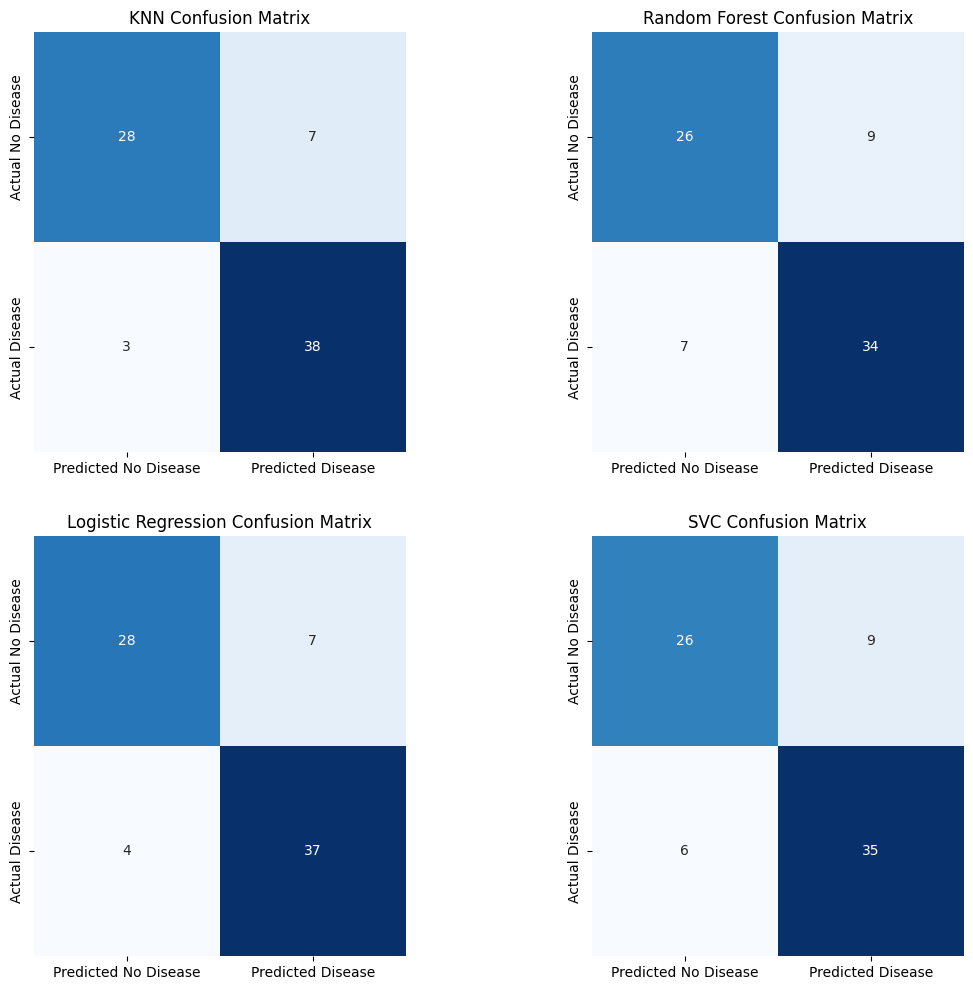

In [65]:
# Define a function to create a 2x2 subplot figure with four confusion matrices
def con_matrix():
    # Create 2x2 subplot figure
    plt.figure(figsize=(12,12))
    plt.subplots_adjust(wspace=0.5, hspace=0.2)

    # Plot KNN confusion matrix in first subplot
    plt.subplot(2,2,1)
    plt.title('KNN Confusion Matrix')
    # we use heatmap to show the confusion matrix
    sns.heatmap(model5_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)

    # Plot Random Forest confusion matrix in second subplot
    plt.subplot(2,2,2)
    plt.title('Random Forest Confusion Matrix')
    sns.heatmap(model4_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)

    # Plot Logistic Regression confusion matrix in third subplot
    plt.subplot(2,2,3)
    plt.title('Logistic Regression Confusion Matrix')
    sns.heatmap(model10_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)

    # Plot SVC confusion matrix in fourth subplot
    plt.subplot(2,2,4)
    plt.title('SVC Confusion Matrix')
    sns.heatmap(model7_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)

    # Show the plot
    plt.show()
            
con_matrix()            

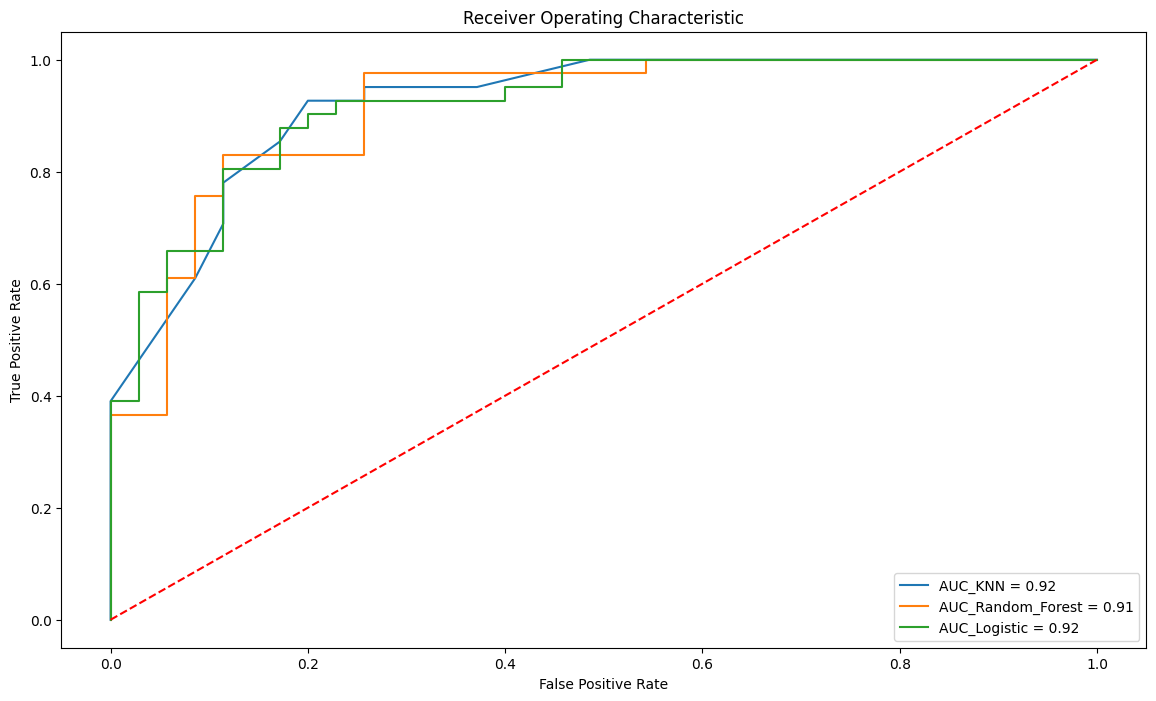

0.90 - 1.00 = excellent
0.80 - 0.90 = good
0.70 - 0.80 = fair
0.60 - 0.70 = poor
0.50 - 0.60 = fail


In [66]:
def metric():
    # Predict probabilities for positive class and extract positive class predictions for Model5
    probs1 = Model5.predict_proba(X1_test)
    preds1 = probs1[:,1]
    # Calculate FPR, TPR, and threshold values and AUC score for Model5
    fpr1, tpr1, threshold1 = metrics.roc_curve(y_test, preds1)
    roc_auc1 = metrics.auc(fpr1,tpr1)

    # Predict probabilities for positive class and extract positive class predictions for Model4
    probs2 = Model4.predict_proba(X_test)
    preds2 = probs2[:,1]
    # Calculate FPR, TPR, and threshold values and AUC score for Model4
    fpr2, tpr2, threshold2 = metrics.roc_curve(y_test, preds2)
    roc_auc2 = metrics.auc(fpr2,tpr2)

    # Predict probabilities for positive class and extract positive class predictions for Model10
    probs3 = Model10.predict_proba(X_test)
    preds3 = probs3[:,1]
    # Calculate FPR, TPR, and threshold values and AUC score for Model10
    fpr3, tpr3, threshold3 = metrics.roc_curve(y_test, preds3)
    roc_auc3 = metrics.auc(fpr3,tpr3)

    #The code defines a function named metric() 
    #that compares the performance of three machine learning models (KNN, Random Forest, and Logistic Regression) 
    #in terms of their Receiver Operating Characteristic (ROC) curves and their corresponding Area Under the Curve (AUC) scores.

    # Plot ROC curves for all models on same graph
    plt.figure(figsize=(14,8))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr1, tpr1, label = 'AUC_KNN = %0.2f' % roc_auc1)
    plt.plot(fpr2, tpr2, label = 'AUC_Random_Forest = %0.2f' % roc_auc2)
    plt.plot(fpr3, tpr3, label = 'AUC_Logistic = %0.2f' % roc_auc3)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    # Print legend to interpret AUC scores for each model
    print('0.90 - 1.00 = excellent')
    print('0.80 - 0.90 = good')
    print('0.70 - 0.80 = fair')
    print('0.60 - 0.70 = poor')
    print('0.50 - 0.60 = fail')

metric()

In [66]:
#the graph is about the roc curve and auc scores. it is displaying mostly the true positive rate which satisfies the ROC. based on the TPR and FPR, auc scores are calculated.